# Car Incurance Classification


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read csv file

In [2]:
#Load data as dataframe
data=pd.read_csv('/Users/alanoudabdulaziz/Desktop/car.csv')

## EDA 

In [3]:
data.head(20)

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
5,877557,40-64,female,majority,20-29y,high school,upper class,0.619127,1.0,after 2015,0.0,1.0,10238,13000.0,sedan,3,0,3,0.0
6,930134,65+,male,majority,30y+,high school,upper class,0.492944,0.0,after 2015,1.0,1.0,10238,13000.0,sedan,7,0,3,0.0
7,461006,26-39,female,majority,0-9y,university,working class,0.468689,0.0,after 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,1.0
8,68366,40-64,female,majority,20-29y,university,working class,0.521815,0.0,before 2015,1.0,0.0,10238,13000.0,sedan,0,0,0,0.0
9,445911,40-64,female,majority,0-9y,high school,upper class,0.561531,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,1.0


In [4]:
# Checking for number of rows and columns
data.shape

(10000, 19)

In [5]:
#transform age and DRIVING EXPERIENCE to integers

data["AGE"].replace({"16-25": 0, "26-39": 1,"40-64":2,"65+":3}, inplace=True)
data["DRIVING_EXPERIENCE"].replace({"0-9y": 0, "10-19y": 1,"20-29y":2,"30y+":3}, inplace=True)


In [6]:
#drop unnecessary feature
data.drop(['POSTAL_CODE','RACE','EDUCATION','INCOME','ID','CHILDREN'], axis=1, inplace=True)

In [7]:
# To check for null value and datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  10000 non-null  int64  
 1   GENDER               10000 non-null  object 
 2   DRIVING_EXPERIENCE   10000 non-null  int64  
 3   CREDIT_SCORE         9018 non-null   float64
 4   VEHICLE_OWNERSHIP    10000 non-null  float64
 5   VEHICLE_YEAR         10000 non-null  object 
 6   MARRIED              10000 non-null  float64
 7   ANNUAL_MILEAGE       9043 non-null   float64
 8   VEHICLE_TYPE         10000 non-null  object 
 9   SPEEDING_VIOLATIONS  10000 non-null  int64  
 10  DUIS                 10000 non-null  int64  
 11  PAST_ACCIDENTS       10000 non-null  int64  
 12  OUTCOME              10000 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 1015.8+ KB


In [8]:
data.isnull().sum()

AGE                      0
GENDER                   0
DRIVING_EXPERIENCE       0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [9]:
# Display statistical information about data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,10000.0,1.489500,1.025278,0.000000,1.000000,1.000000,2.000000,3.000000
DRIVING_EXPERIENCE,10000.0,1.069300,0.990452,0.000000,0.000000,1.000000,2.000000,3.000000
CREDIT_SCORE,9018.0,0.515813,0.137688,0.053358,0.417191,0.525033,0.618312,0.960819
VEHICLE_OWNERSHIP,10000.0,0.697000,0.459578,0.000000,0.000000,1.000000,1.000000,1.000000
MARRIED,10000.0,0.498200,0.500022,0.000000,0.000000,0.000000,1.000000,1.000000
ANNUAL_MILEAGE,9043.0,11697.003207,2818.434528,2000.000000,10000.000000,12000.000000,14000.000000,22000.000000
SPEEDING_VIOLATIONS,10000.0,1.482900,2.241966,0.000000,0.000000,0.000000,2.000000,22.000000
DUIS,10000.0,0.239200,0.554990,0.000000,0.000000,0.000000,0.000000,6.000000
PAST_ACCIDENTS,10000.0,1.056300,1.652454,0.000000,0.000000,0.000000,2.000000,15.000000
OUTCOME,10000.0,0.313300,0.463858,0.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
data['CREDIT_SCORE'] = data['CREDIT_SCORE'].fillna(0)

In [11]:
data.head(20)

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,female,0,0.629027,1.0,after 2015,0.0,12000.0,sedan,0,0,0,0.0
1,0,male,0,0.357757,0.0,before 2015,0.0,16000.0,sedan,0,0,0,1.0
2,0,female,0,0.493146,1.0,before 2015,0.0,11000.0,sedan,0,0,0,0.0
3,0,male,0,0.206013,1.0,before 2015,0.0,11000.0,sedan,0,0,0,0.0
4,1,male,1,0.388366,1.0,before 2015,0.0,12000.0,sedan,2,0,1,1.0
5,2,female,2,0.619127,1.0,after 2015,0.0,13000.0,sedan,3,0,3,0.0
6,3,male,3,0.492944,0.0,after 2015,1.0,13000.0,sedan,7,0,3,0.0
7,1,female,0,0.468689,0.0,after 2015,0.0,14000.0,sedan,0,0,0,1.0
8,2,female,2,0.521815,0.0,before 2015,1.0,13000.0,sedan,0,0,0,0.0
9,2,female,0,0.561531,1.0,before 2015,0.0,11000.0,sedan,0,0,0,1.0


In [12]:
data.fillna(data['ANNUAL_MILEAGE'].mean(), inplace=True)

In [13]:
data.head(20)

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,female,0,0.629027,1.0,after 2015,0.0,12000.000000,sedan,0,0,0,0.0
1,0,male,0,0.357757,0.0,before 2015,0.0,16000.000000,sedan,0,0,0,1.0
2,0,female,0,0.493146,1.0,before 2015,0.0,11000.000000,sedan,0,0,0,0.0
3,0,male,0,0.206013,1.0,before 2015,0.0,11000.000000,sedan,0,0,0,0.0
4,1,male,1,0.388366,1.0,before 2015,0.0,12000.000000,sedan,2,0,1,1.0
5,2,female,2,0.619127,1.0,after 2015,0.0,13000.000000,sedan,3,0,3,0.0
6,3,male,3,0.492944,0.0,after 2015,1.0,13000.000000,sedan,7,0,3,0.0
7,1,female,0,0.468689,0.0,after 2015,0.0,14000.000000,sedan,0,0,0,1.0
8,2,female,2,0.521815,0.0,before 2015,1.0,13000.000000,sedan,0,0,0,0.0
9,2,female,0,0.561531,1.0,before 2015,0.0,11000.000000,sedan,0,0,0,1.0


### Featuers engineering

#### Divided feature ANNUAL_MILEAGE by 1000

In [14]:
data['ANNUAL_MILEAGE']=data["ANNUAL_MILEAGE"]/1000

In [15]:
data.head(20)

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,3,female,0,0.629027,1.0,after 2015,0.0,12.000000,sedan,0,0,0,0.0
1,0,male,0,0.357757,0.0,before 2015,0.0,16.000000,sedan,0,0,0,1.0
2,0,female,0,0.493146,1.0,before 2015,0.0,11.000000,sedan,0,0,0,0.0
3,0,male,0,0.206013,1.0,before 2015,0.0,11.000000,sedan,0,0,0,0.0
4,1,male,1,0.388366,1.0,before 2015,0.0,12.000000,sedan,2,0,1,1.0
5,2,female,2,0.619127,1.0,after 2015,0.0,13.000000,sedan,3,0,3,0.0
6,3,male,3,0.492944,0.0,after 2015,1.0,13.000000,sedan,7,0,3,0.0
7,1,female,0,0.468689,0.0,after 2015,0.0,14.000000,sedan,0,0,0,1.0
8,2,female,2,0.521815,0.0,before 2015,1.0,13.000000,sedan,0,0,0,0.0
9,2,female,0,0.561531,1.0,before 2015,0.0,11.000000,sedan,0,0,0,1.0


In [16]:
data.shape

(10000, 13)

### DUMMY VARIABLES 1

In [17]:
df=data['GENDER']

In [18]:
df.head()

0    female
1      male
2    female
3      male
4      male
Name: GENDER, dtype: object

In [19]:
set(df)

{'female', 'male'}

In [20]:
df=pd.get_dummies(df, drop_first=True)

In [21]:
df.shape

(10000, 1)

In [22]:
df.head()

,male
0,0
1,1
2,0
3,1
4,1


### DUMMY VARIABLES 2


In [23]:
df1=data['VEHICLE_YEAR']

In [24]:
df1.head()

0     after 2015
1    before 2015
2    before 2015
3    before 2015
4    before 2015
Name: VEHICLE_YEAR, dtype: object

In [25]:
set(df1)

{'after 2015', 'before 2015'}

In [26]:
df1=pd.get_dummies(df1, drop_first=True)

In [27]:
df1.shape

(10000, 1)

In [28]:
df1.head()

,before 2015
0,0
1,1
2,1
3,1
4,1


### DUMMY VARIABLES 3

In [29]:
df2=data['VEHICLE_TYPE']

In [30]:
df2.head()

0    sedan
1    sedan
2    sedan
3    sedan
4    sedan
Name: VEHICLE_TYPE, dtype: object

In [31]:
set(df2)

{'sedan', 'sports car'}

In [32]:
df2=pd.get_dummies(df2, drop_first=True)

In [33]:
df2.head()

,sports car
0,0
1,0
2,0
3,0
4,0


## Concat

In [34]:
#concat the dummies with other feauter 
data_concat=pd.concat([data, df, df1, df2],axis=1)

In [35]:
data_concat.head()

,AGE,GENDER,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,male,before 2015,sports car
0,3,female,0,0.629027,1.0,after 2015,0.0,12.0,sedan,0,0,0,0.0,0,0,0
1,0,male,0,0.357757,0.0,before 2015,0.0,16.0,sedan,0,0,0,1.0,1,1,0
2,0,female,0,0.493146,1.0,before 2015,0.0,11.0,sedan,0,0,0,0.0,0,1,0
3,0,male,0,0.206013,1.0,before 2015,0.0,11.0,sedan,0,0,0,0.0,1,1,0
4,1,male,1,0.388366,1.0,before 2015,0.0,12.0,sedan,2,0,1,1.0,1,1,0


In [36]:
data_concat.shape

(10000, 16)

In [37]:
#drop the column that we transform to dummies
data_concat.drop(['GENDER','VEHICLE_YEAR','VEHICLE_TYPE'], axis=1, inplace=True)

In [38]:
data_concat.head()

,AGE,DRIVING_EXPERIENCE,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,male,before 2015,sports car
0,3,0,0.629027,1.0,0.0,12.0,0,0,0,0.0,0,0,0
1,0,0,0.357757,0.0,0.0,16.0,0,0,0,1.0,1,1,0
2,0,0,0.493146,1.0,0.0,11.0,0,0,0,0.0,0,1,0
3,0,0,0.206013,1.0,0.0,11.0,0,0,0,0.0,1,1,0
4,1,1,0.388366,1.0,0.0,12.0,2,0,1,1.0,1,1,0


In [39]:
data_concat.shape

(10000, 13)

In [40]:
#rename the dummies column
data_concat.rename(columns={'before 2015':'VEHICLE_YEAR(before 2015)','male':'GENDER','sports car':'VEHICLE_TYPE(sports car)'}, inplace=True)

In [41]:
data_concat.columns

Index(['AGE', 'DRIVING_EXPERIENCE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'MARRIED', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'GENDER', 'VEHICLE_YEAR(before 2015)',
       'VEHICLE_TYPE(sports car)'],
      dtype='object')

In [42]:
#save dataset as csv after the cleaning
data_concat.to_csv("Car_ins_Clean.csv")


## Data Visualization


/Users/alanoudabdulaziz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


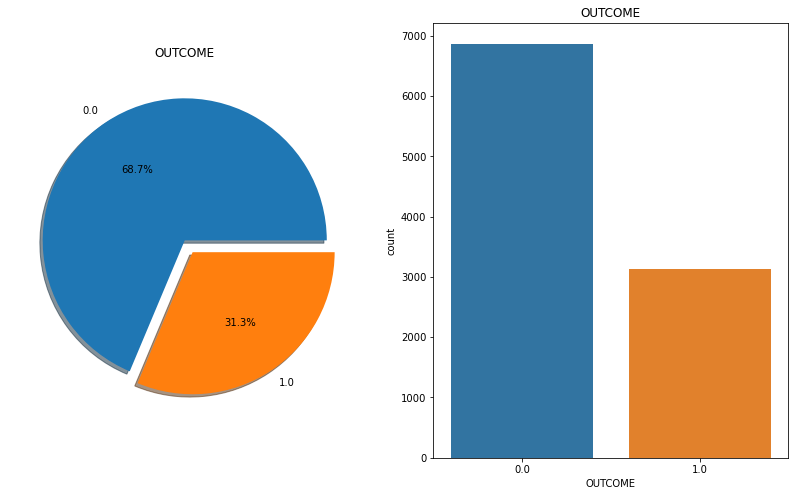

In [43]:
f,ax=plt.subplots(1,2,figsize=(14,8))
data['OUTCOME'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('OUTCOME')
ax[0].set_ylabel('')
sns.countplot('OUTCOME',data=data_concat,ax=ax[1])
ax[1].set_title('OUTCOME')
plt.show()

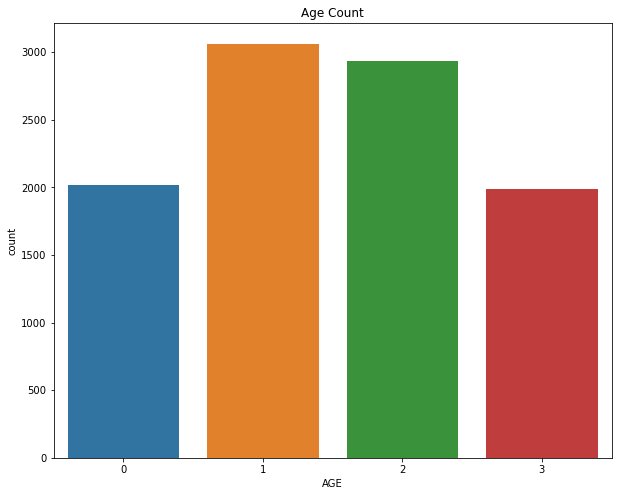

In [44]:
plt.figure(figsize=(10,8))
plt.title('Age Count')
sns.countplot(data=data_concat, x ='AGE');

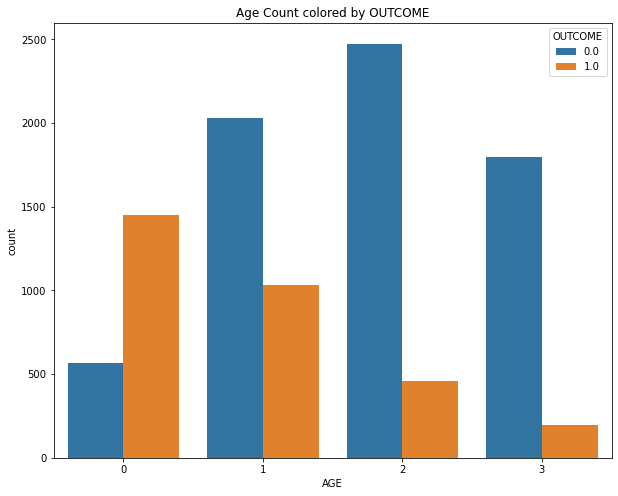

In [45]:
plt.figure(figsize=(10,8))
plt.title('Age Count colored by OUTCOME')
sns.countplot(data=data_concat, x ='AGE', hue='OUTCOME');

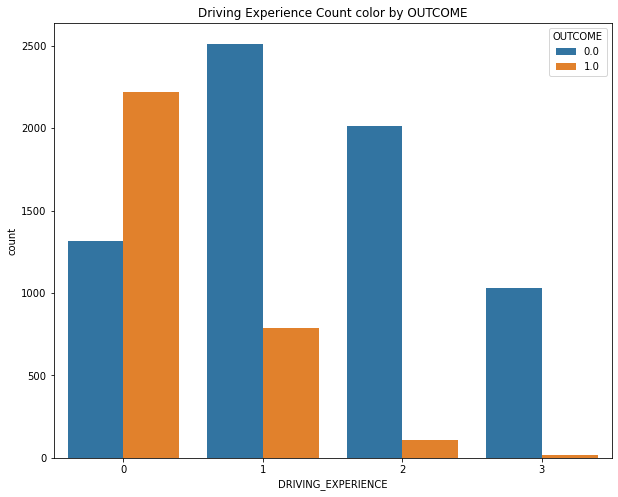

In [46]:
plt.figure(figsize=(10,8))
plt.title('Driving Experience Count color by OUTCOME')
sns.countplot(data=data_concat, x ='DRIVING_EXPERIENCE', hue='OUTCOME');

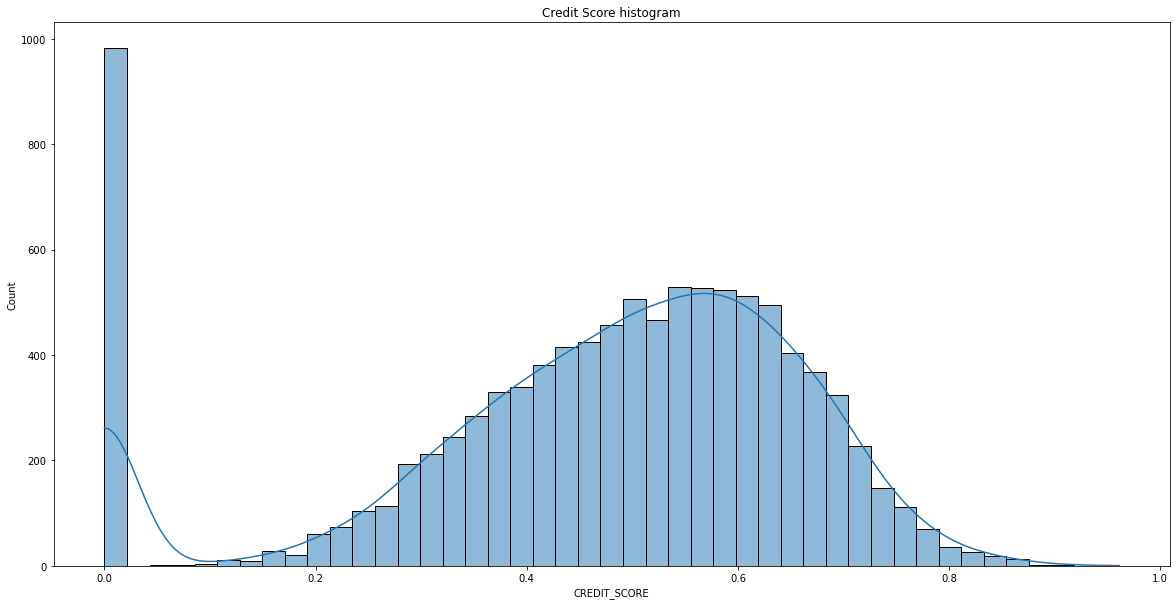

In [47]:
plt.figure(figsize=(20,10))
plt.title('Credit Score histogram')
sns.histplot(data=data_concat, x='CREDIT_SCORE', kde=True);

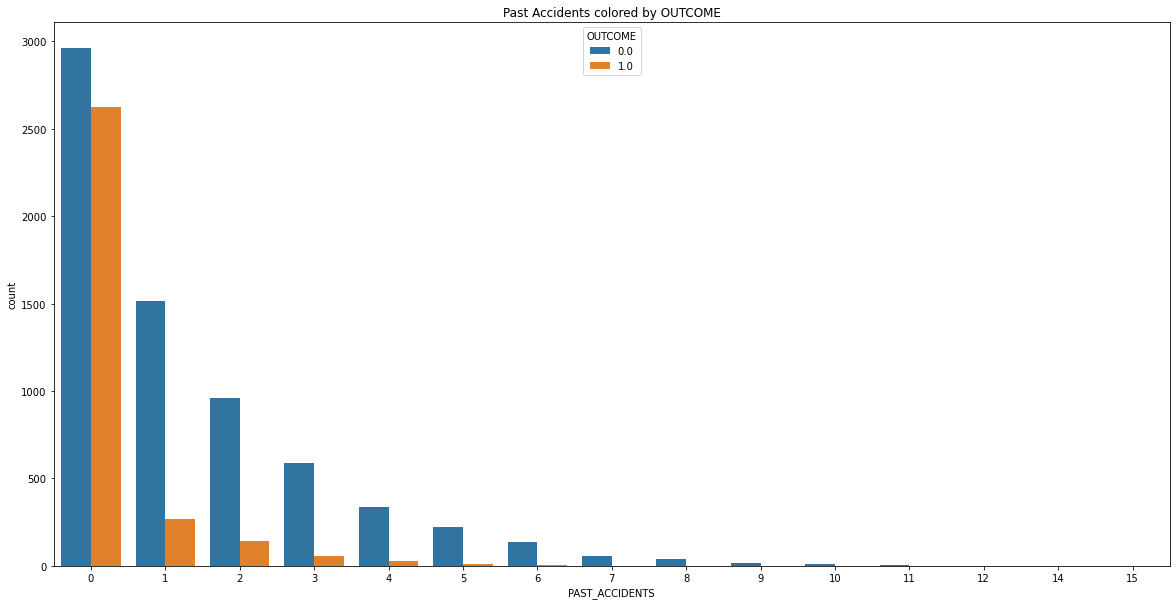

In [48]:
plt.figure(figsize=(20,10))
plt.title('Past Accidents colored by OUTCOME')
sns.countplot(data=data_concat, x='PAST_ACCIDENTS',hue='OUTCOME');

## split

In [49]:
X= data_concat[['AGE', 'DRIVING_EXPERIENCE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'MARRIED', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'GENDER', 'VEHICLE_YEAR(before 2015)',
       'VEHICLE_TYPE(sports car)']]
y= data_concat[['OUTCOME']]

#### The most important features

In [50]:
#apply SelectKBest to extract top 8 best features for housing df
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(8,'Score'))  #print 5best features

                     Features        Score
6         SPEEDING_VIOLATIONS  2887.066711
8              PAST_ACCIDENTS  2508.021498
1          DRIVING_EXPERIENCE  2269.811726
0                         AGE  1419.228375
7                        DUIS   461.643440
3           VEHICLE_OWNERSHIP   435.051851
4                     MARRIED   344.728209
10  VEHICLE_YEAR(before 2015)   262.477884


#### Now, we finished the EDA and we did some visualization for the data.